<h6>Projet AI & cybersecurity :</h6>
<h2 align="center">  Système de détection d’intrusion </h2>  
<h6 align="right" > réalisé par : Malèk YAICH </h6>
</br>

# I. Importation des bibliothèques 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [3]:
data=pd.read_csv("CICIDS2017_sample_km.csv")
data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
data.Label.value_counts()

0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64

In [5]:
data.isnull().sum().head(20)

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
dtype: int64

In [6]:
data.shape

(26800, 78)

### Split train set and test set

In [7]:
x=data.drop(['Label'],axis=1)
y=data['Label']
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=0)
#shuffle= False

### SMOTE to solve class-imbalance

In [8]:
#pip install imblearn

In [9]:
pd.Series(ytrain).value_counts()

0    14569
3     2430
6     1728
1     1579
5     1024
2       82
4       28
Name: Label, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(n_jobs=-1, sampling_strategy={2:1000,4:1000})

In [11]:
xtrain,ytrain = smote.fit_resample(xtrain,ytrain)

In [12]:
pd.Series(ytrain).value_counts()

0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: Label, dtype: int64

# II. ML model training : Ridge Classifier CV 

RidgeClassifierCV est un modèle de classification linéaire régularisé qui utilise la régression ridge pour résoudre les problèmes de classification. Il est disponible dans la bibliothèque scikit-learn de Python.

Le modèle RidgeClassifierCV est une version améliorée du RidgeClassifier standard. ils sont basé sur la régression logistique régularisée et utilise une régularisation L2 pour limiter la complexité du modèle.La différence entre les deux est que RidgeClassifierCV effectue une validation croisée pour sélectionner le meilleur paramètre de régularisation. La régularisation est utilisée pour éviter le surapprentissage et améliorer la généralisation du modèle.

Le modèle RidgeClassifierCV est très utile pour les problèmes de classification linéaire, notamment lorsque le nombre de caractéristiques (ou de variables) est élevé et que le risque de surapprentissage est présent. La validation croisée automatique permet d'optimiser la performance du modèle et d'éviter les biais de sélection de paramètres.

In [13]:
from sklearn.linear_model import RidgeClassifierCV

In [14]:
%%time
RC = RidgeClassifierCV().fit(xtrain, ytrain)

Wall time: 331 ms


In [15]:
ypred= RC.predict(xtest)
ypred.shape

(5360,)

In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3656
           1       0.21      0.02      0.04       387
           2       0.00      0.00      0.00        14
           3       0.97      0.65      0.78       612
           4       0.13      0.50      0.21         8
           5       0.63      0.54      0.58       231
           6       0.81      0.84      0.83       452

    accuracy                           0.81      5360
   macro avg       0.51      0.50      0.47      5360
weighted avg       0.78      0.81      0.78      5360



In [17]:
print("Accuracy of Ridge Classifier CV : "+str(accuracy_score(ytest,ypred)) +"\n")
print("Precision of Ridge Classifier CV : "+str(precision_score(ytest,ypred,average="weighted"))+"\n")
print("Recall of Ridge Classifier CV : "+str(recall_score(ytest,ypred,average="weighted"))+"\n")
print("Average F1 of Ridge Classifier CV : "+str(f1_score(ytest,ypred,average="weighted"))+"\n")
print("F1 of Ridge Classifier CV for each type of attack: "+str(f1_score(ytest,ypred, average=None )))

Accuracy of Ridge Classifier CV : 0.8095149253731343

Precision of Ridge Classifier CV : 0.7760521911382349

Recall of Ridge Classifier CV : 0.8095149253731343

Average F1 of Ridge Classifier CV : 0.7801699160439877

F1 of Ridge Classifier CV for each type of attack: [0.87088993 0.03755869 0.         0.77603143 0.21052632 0.57808858
 0.82532751]


###  plot the confusion matrix

In [1]:
cm= confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True , linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.title("Confusionn matrix")
plt.show()

NameError: name 'confusion_matrix' is not defined

# III. ML model training : VBGMM

VBGMM signifie "Variational Bayesian Gaussian Mixture Model", soit en français "Modèle de mélange de Gaussiennes bayésien variationnel". C'est une méthode d'apprentissage non supervisé qui permet de modéliser des données multidimensionnelles à partir d'un mélange de distributions gaussiennes.

Le VBGMM est une extension du GMM (Gaussian Mixture Model) qui utilise une approche bayésienne et une méthode d'optimisation variationnelle pour estimer les paramètres du modèle. Contrairement au GMM classique qui nécessite de fixer à l'avance le nombre de composantes gaussiennes du mélange, le VBGMM utilise un processus de Dirichlet pour permettre au modèle de déterminer automatiquement le nombre optimal de composantes gaussiennes nécessaires pour modéliser les données.

Le VBGMM n'est pas un classificateur en tant que tel, mais il peut être utilisé pour effectuer de la classification en ajoutant une étape supplémentaire de labélisation des données.

en effet on peut utiliser le modèle VBGMM comme un algorithme de clustering pour regrouper les données en clusters, puis attribuer une étiquette de classe à chaque cluster en utilisant le mode de la classe majoritaire dans chaque cluster comme étiquette de classe pour ce cluster.

In [19]:
from sklearn.mixture import BayesianGaussianMixture

In [20]:
VBGMM= BayesianGaussianMixture(n_components=7)

In [21]:
%%time
VBGMM.fit(xtrain)

Wall time: 52.2 s


BayesianGaussianMixture(n_components=7)

### Obtenir les étiquettes de cluster pour les données


In [22]:
cluster_labels = VBGMM.predict(xtrain)

### Associer une étiquette de classe à chaque cluster


In [23]:
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
for i in range(7):
    mask = (cluster_labels == i)
    labels[mask] = mode(ytrain[mask])[0]

In [24]:
np.unique(labels)

array([0, 3, 4], dtype=int64)

In [25]:
ypred=labels
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79     14569
           1       0.00      0.00      0.00      1579
           2       0.00      0.00      0.00      1000
           3       0.65      0.46      0.54      2430
           4       0.85      0.79      0.82      1000
           5       0.00      0.00      0.00      1024
           6       0.00      0.00      0.00      1728

    accuracy                           0.68     23330
   macro avg       0.31      0.31      0.31     23330
weighted avg       0.52      0.68      0.58     23330



In [26]:
print("Accuracy of VBGMM : "+str(accuracy_score(ytrain,ypred)) +"\n")
print("Precision of VBGMM : "+str(precision_score(ytrain,ypred,average="weighted"))+"\n")
print("Recall of VBGMM : "+str(recall_score(ytrain,ypred,average="weighted"))+"\n")
print("Average F1 of VBGMM : "+str(f1_score(ytrain,ypred,average="weighted"))+"\n")
print("F1 of VBGMM for each type of attack: "+str(f1_score(ytrain,ypred, average=None )))

Accuracy of VBGMM : 0.676553793399057

Precision of VBGMM : 0.5233980988796071

Recall of VBGMM : 0.676553793399057

Average F1 of VBGMM : 0.582746270929516

F1 of VBGMM for each type of attack: [0.7873239  0.         0.         0.53753027 0.81875    0.
 0.        ]


###  plot the confusion matrix

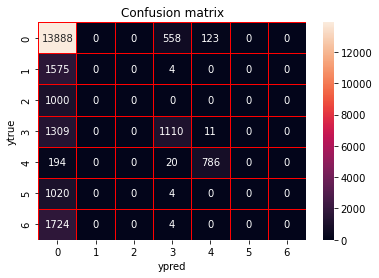

In [27]:
cm= confusion_matrix(ytrain,ypred)
sns.heatmap(cm,annot=True , linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.title("Confusion matrix")
plt.show()